In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [1]:
!pip install numpy pandas matplotlib seaborn statsmodels scipy nose sympy patsy seaborn

In [10]:
import pathlib
PATH = pathlib.Path(".") 

# Data

     - Historical Sales and Active Inventory (kaggle https://www.kaggle.com/flenderson/sales-analysis )

In [12]:
sales_data = pd.read_csv(PATH/"data/SalesKaggle3.csv", low_memory=False)
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [13]:
sales_data.head().T

,0,1,2,3,4
Order,2,3,4,6,7
File_Type,Historical,Historical,Historical,Historical,Historical
SKU_number,1737127,3255963,612701,115883,863939
SoldFlag,0,0,0,1,1
SoldCount,0,0,0,1,1
MarketingType,D,D,D,D,D
ReleaseNumber,15,7,0,4,2
New_Release_Flag,1,1,0,1,1
StrengthFactor,682743,1.01601e+06,340464,334011,1.28794e+06
PriceReg,44.99,24.81,46,100,121.95


## Col Names
    
    - File_type The value "Active means that the particulkar product ned investigation 
    
    - SKU_number: This is the unique identifier for each product.

    - Order: Just a sequential counter. Can be ignored.

    - SoldFlag: 1 = sold in past 6 mos. 0 = Not sold

    - MarketingType = Two categories of how we market the product. This should probably be ignored, or better yet, each type should be considered independently.

    - New_Release_Flag = Any product that has had a future release (i.e., Release Number > 1)

In [ ]:
%

In [17]:
sales_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order,198917,NaN,NaN,NaN,106484,60136.7,2,55665,108569,158298,208027
File_Type,198917,2,Active,122921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU_number,198917,NaN,NaN,NaN,861363,869979,50001,217252,612208,904751,3.96079e+06
SoldFlag,75996,NaN,NaN,NaN,0.171009,0.376519,0,0,0,0,1
SoldCount,75996,NaN,NaN,NaN,0.322306,1.16862,0,0,0,0,73
MarketingType,198917,2,S,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseNumber,198917,NaN,NaN,NaN,3.4122,3.86424,0,1,2,5,99
New_Release_Flag,198917,NaN,NaN,NaN,0.642248,0.47934,0,0,1,1,1
StrengthFactor,198917,NaN,NaN,NaN,1.11712e+06,1.52209e+06,6.275,161419,582224,1.43008e+06,1.73845e+07
PriceReg,198917,NaN,NaN,NaN,90.8952,86.7364,0,42,69.95,116,12671.5


In [18]:
print(sales_data.shape)

(198917, 14)


In [19]:
sales_data.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [23]:
sales_data_hist = sales_data[sales_data["File_Type"] =="Historical"]
sales_data_act = sales_data[sales_data["File_Type"] =="Active"]


# Univariate and Bivariate analysis
    
       - Unvivariate distribution are graphs where we plot hist with PDF
       - Bivariate analysis is a scatter plot b/w 2 variables

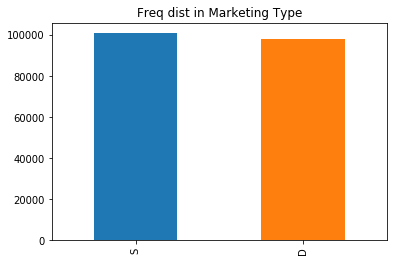

In [26]:
sales_data["MarketingType"].value_counts().plot.bar(title="Freq dist in Marketing Type")#when catgerical data

/home/shilpa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shilpa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shilpa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shilpa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/shilpa/anaconda3/lib/python3.6

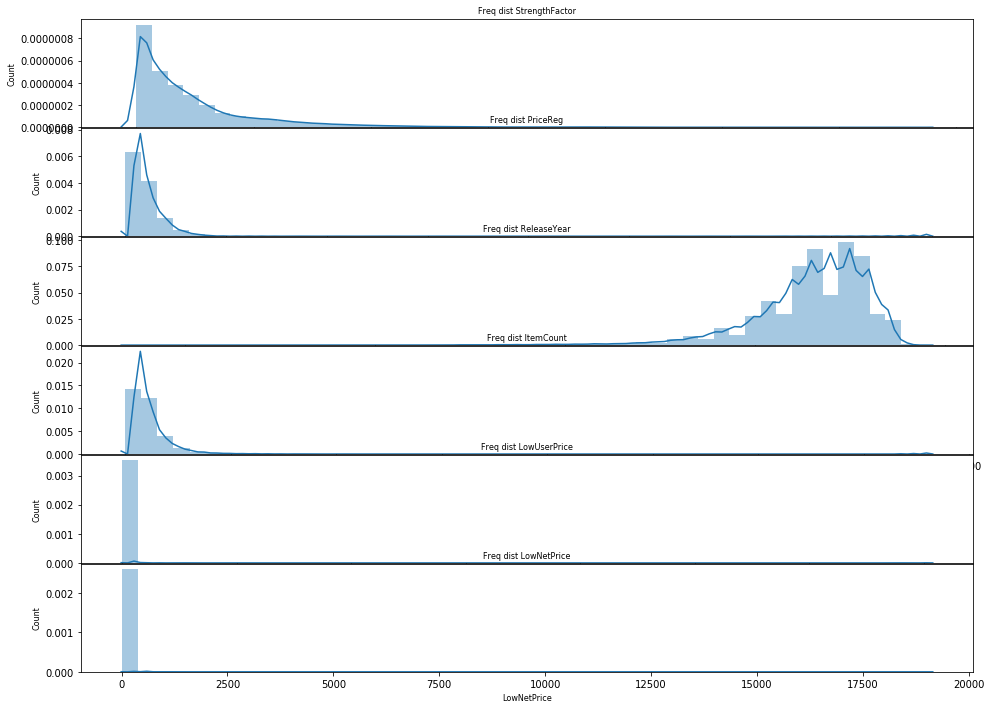

In [43]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=8)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    plt.subplots_adjust(hspace = .01)

plt.show()

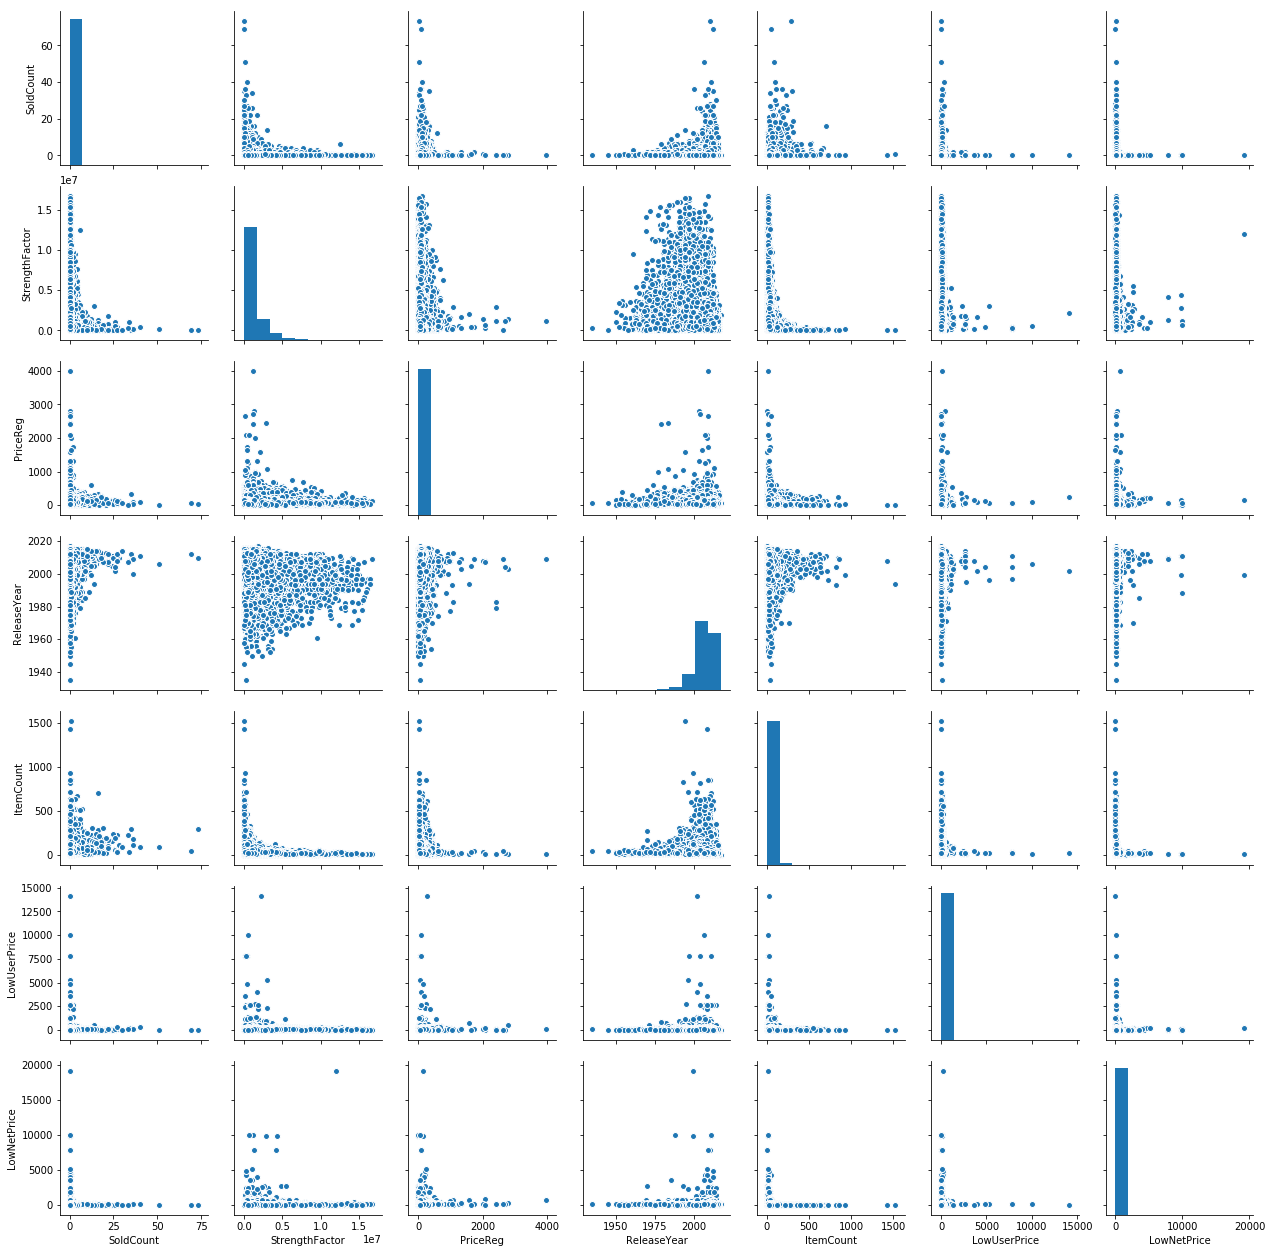

In [44]:
sales_data_hist = sales_data_hist.drop([   
    'Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'
], axis=1)
sns.pairplot(sales_data_hist) #Bivariate anaylsis

# Missing Value analysis


In [46]:
sales_data.isnull().values.any()

True

In [47]:
sales_data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [48]:
#sales_data["SoldFlag"].fillna(0,inplace=True)

In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg")

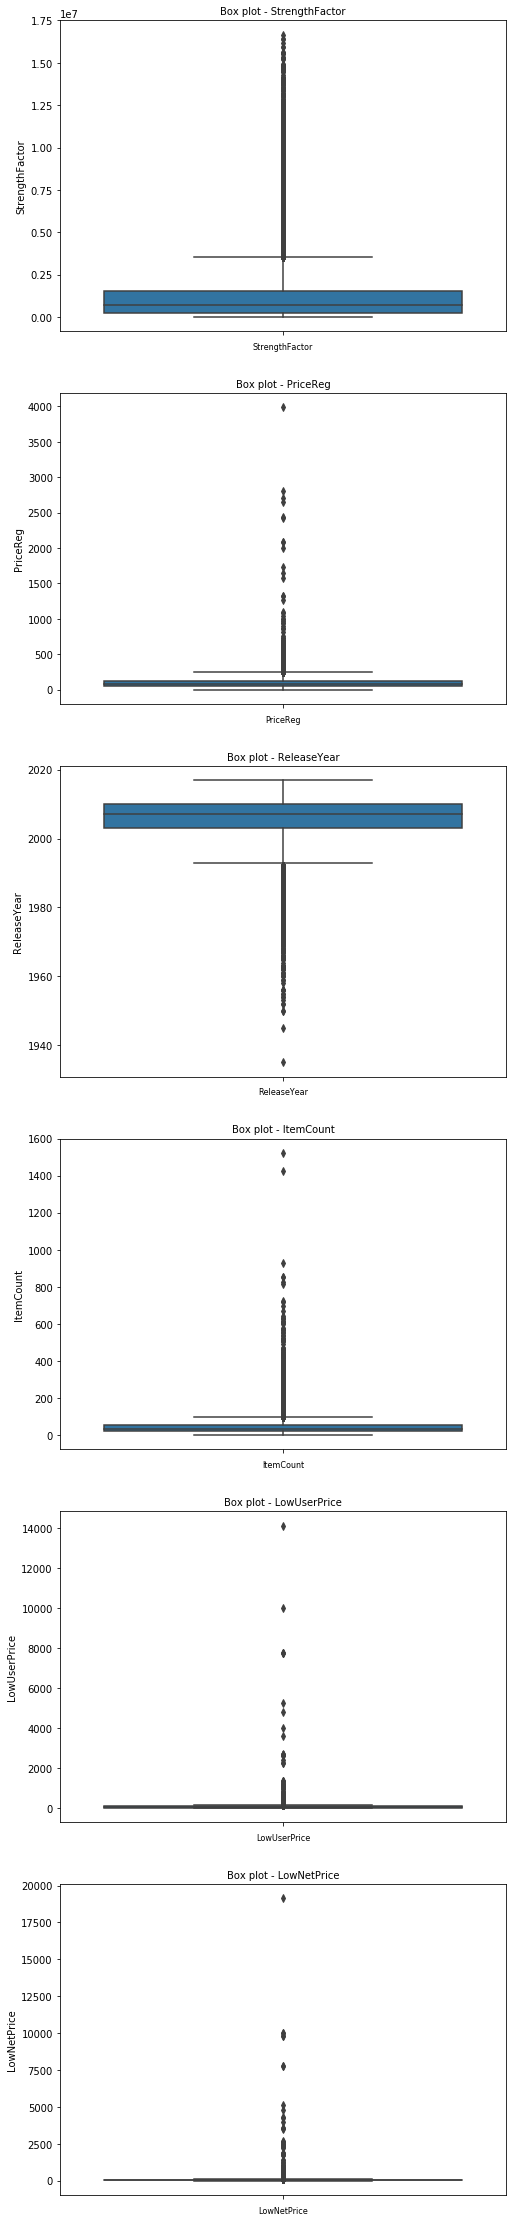

In [49]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=sales_data_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

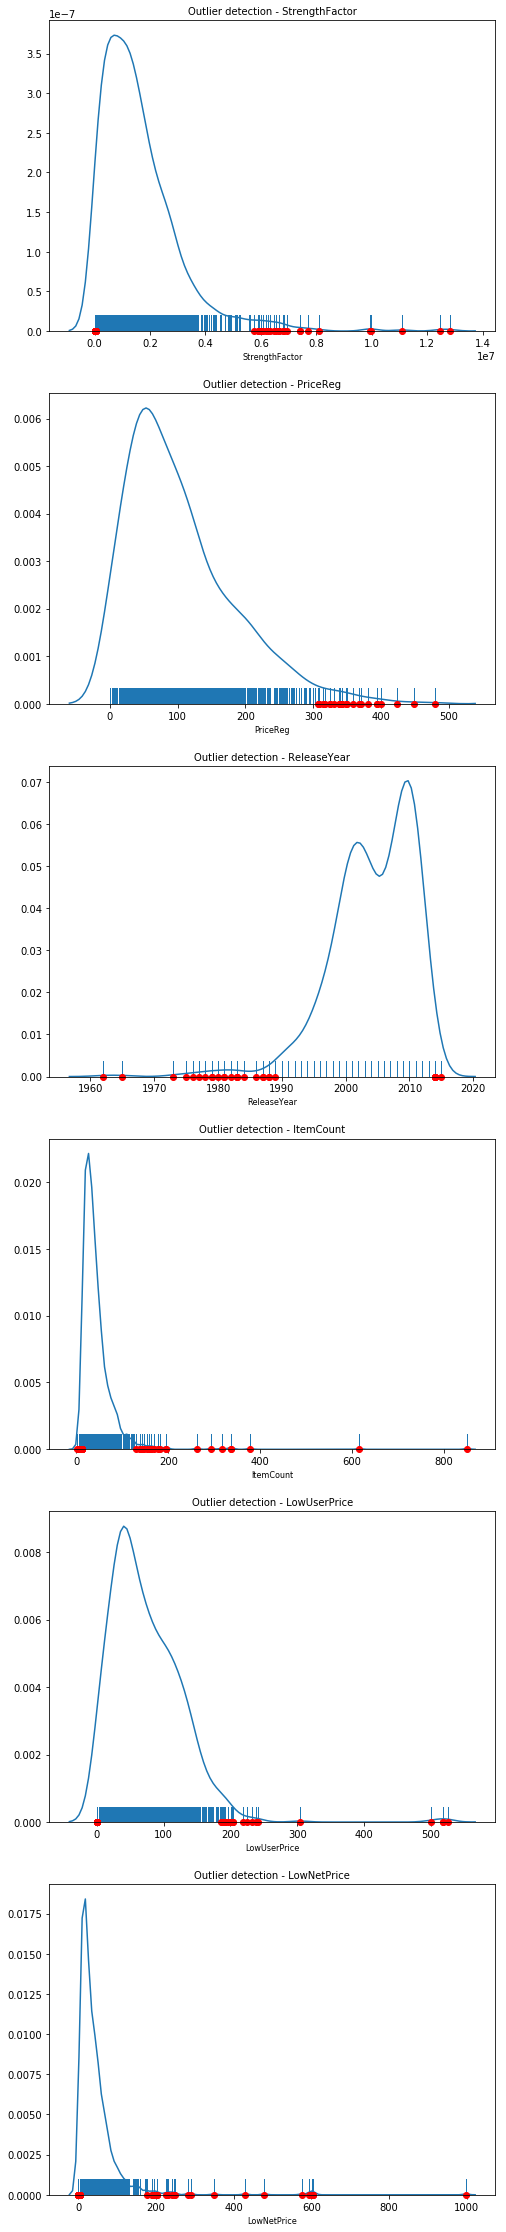

In [51]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']


fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = sales_data_hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

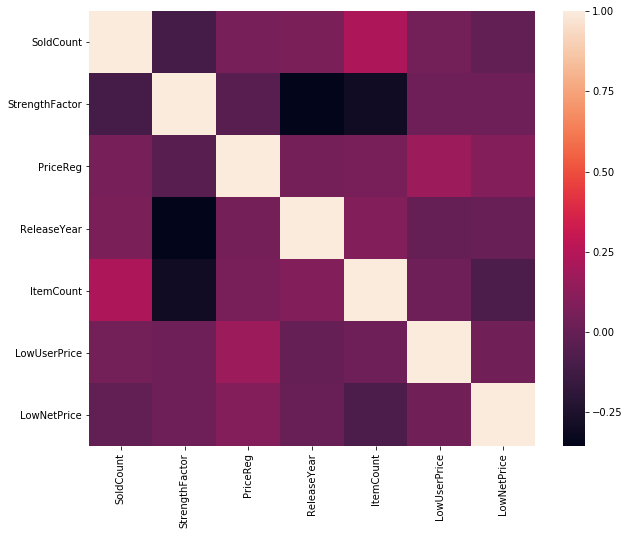

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sales_data_hist.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)